# Import External Libraries #

In [59]:
# import pandas module #
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

# Load SLC 2016 Crime Stats #

In [2]:
# Load Data from Website #
data = pd.read_json('https://opendata.utah.gov/resource/7p7e-e29k.json')

# Look at Data #

In [3]:
# Look at data #
data.describe()

,day_of_week,police_grid,x_coordinate,y_coordiante
count,1000.000000,9.900000e+02,9.910000e+02,990.000000
mean,3.936000,2.054235e+03,1.887922e+06,883095.414141
std,2.064017,6.044629e+04,3.390839e+04,8012.999720
min,1.000000,7.000000e+00,8.622290e+05,813676.000000
25%,2.000000,1.230000e+02,1.884953e+06,877199.250000
50%,4.000000,1.330000e+02,1.889454e+06,884792.000000
75%,6.000000,1.520000e+02,1.894215e+06,888391.750000
max,7.000000,1.902031e+06,1.914731e+06,913504.000000


In [4]:
data.head()

,case,city,city_council,day_of_week,description,ibr,location,ncic_code,occurred,police_grid,police_zone,reported,x_coordinate,y_coordiante
0,SL201624,SALT LAKE CITY,2,6,STOLEN VEHICLE,240,1400 S EMERY ST ...,2499-13,2016-01-01T00:36:15.000,123.0,Z2,2016-01-01T00:36:15.000,1882550.0,876155.0
1,SL201637,SALT LAKE CITY,4,6,DUI ALCOHOL,90D,200 W 500 S ...,5404-0,2016-01-01T01:00:24.000,134.0,Z3,2016-01-01T01:00:24.000,1890252.0,883639.0
2,SL201656,SALT LAKE CITY,4,6,DUI ALCOHOL,90D,400 S WEST TEMPLE ST ...,5404-0,2016-01-01T01:23:44.000,135.0,Z3,2016-01-01T01:23:44.000,1891039.0,883995.0
3,SL201648,SALT LAKE CITY,SL,6,ALCOHOL IN VEH,90D,NaN,5499-44,2016-01-01T01:10:27.000,40.0,40,2016-01-01T01:10:27.000,1869739.0,890270.0
4,SL201660,SALT LAKE CITY,5,6,DUI ALCOHOL,90D,900 S MAIN ST ...,5404-0,2016-01-01T01:33:42.000,152.0,Z5,2016-01-01T01:33:42.000,1891819.0,880413.0


# Sanitize Data #

In [5]:
data.index = pd.to_datetime(data['occurred'])
data['y_coordinate'] = data['y_coordiante']

In [5]:
# min date #
print(data.index.max())

2016-04-18 07:55:54


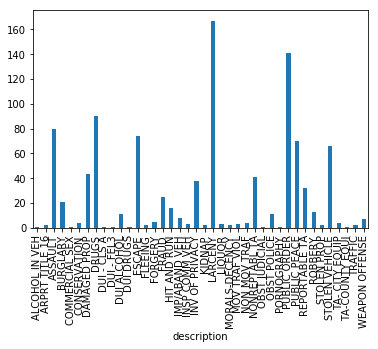

In [55]:
# Crime Categories #
data.groupby('description').case.agg('count').plot(kind='bar')

0


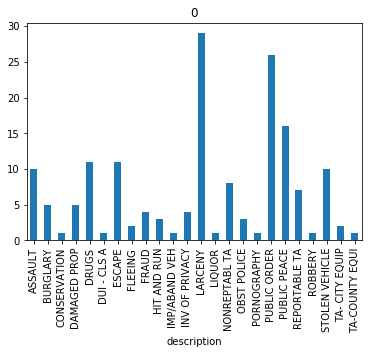

1


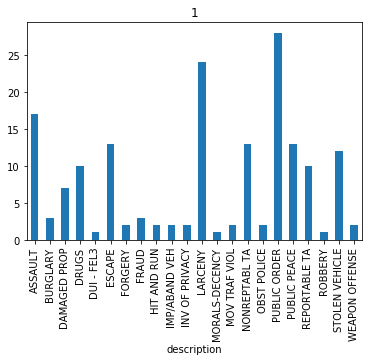

2


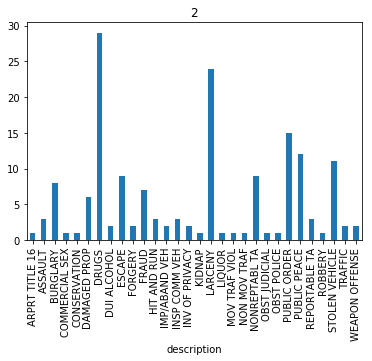

3


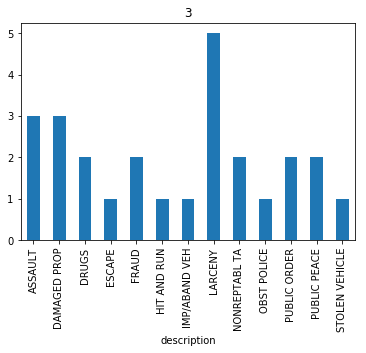

4


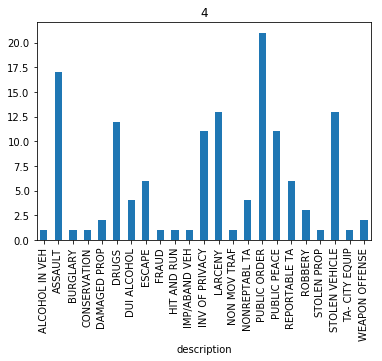

5


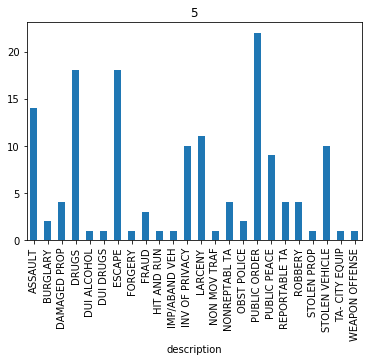

In [30]:
for day in range(6):
    print(day)
    t = data[ (data.index.dayofweek == day)]
    t.groupby('description').case.agg('count').plot(kind='bar')
    plt.title('{0}'.format(str(day)))
    plt.show()

1887922.2764883956 883095.4141414141
(1000, 15)


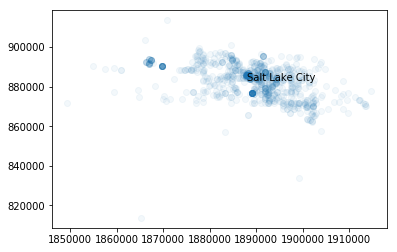

In [7]:
# fig = plt.subplot(111)
plt.plot(data['x_coordinate'], data['y_coordinate'], marker='o', linestyle='', alpha=.05)
plt.text(data['x_coordinate'].mean(), data['y_coordiante'].mean(), 'Salt Lake City')
print( data['x_coordinate'].mean(), data['y_coordiante'].mean())
# print(data[data['city'] == 'SALT LAKE CITY'])
print(data.shape)

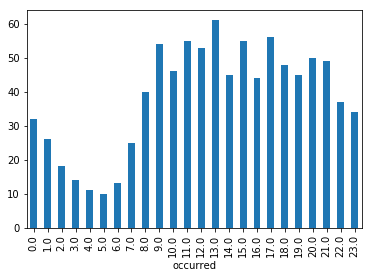

In [8]:
t = data[ (data.index > dt.datetime(2016,1,1)) & (data.index < dt.datetime(2016,1,2))]
data['case'].groupby(data.index.hour).agg('count').plot(kind='bar')


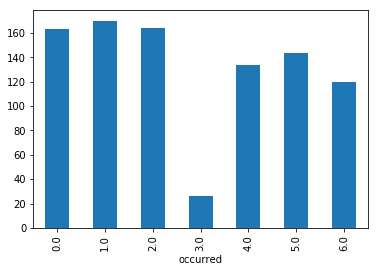

In [56]:
data['case'].groupby(data.index.dayofweek).agg('count').plot(kind='bar')

In [57]:
display(data['case'].groupby([data.index.dayofweek,data.index.hour]).agg('count').unstack(-1))

occurred,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
occurred,,,,,,,,,,,,,,,,,,,,,
0.0,6.0,4.0,2.0,3.0,1.0,3.0,3.0,5.0,5.0,12.0,...,9.0,8.0,10.0,8.0,7.0,11.0,7.0,9.0,5.0,3.0
1.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,8.0,11.0,15.0,...,9.0,11.0,8.0,10.0,8.0,11.0,5.0,13.0,5.0,4.0
2.0,3.0,NaN,NaN,NaN,1.0,3.0,3.0,2.0,10.0,11.0,...,9.0,7.0,8.0,12.0,8.0,3.0,14.0,6.0,3.0,8.0
3.0,4.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0
4.0,5.0,12.0,7.0,3.0,3.0,NaN,NaN,4.0,2.0,3.0,...,5.0,7.0,7.0,5.0,8.0,5.0,10.0,6.0,10.0,2.0
5.0,5.0,NaN,3.0,1.0,3.0,1.0,NaN,2.0,8.0,4.0,...,8.0,11.0,8.0,12.0,12.0,7.0,5.0,7.0,8.0,13.0
6.0,4.0,8.0,4.0,5.0,1.0,1.0,5.0,3.0,3.0,7.0,...,4.0,9.0,2.0,8.0,5.0,8.0,8.0,7.0,6.0,3.0


Text(0.5, 1.0, 'Crime hour vs day of week (2016-01-01 00:20:10 - 2016-04-18 07:55:54)')

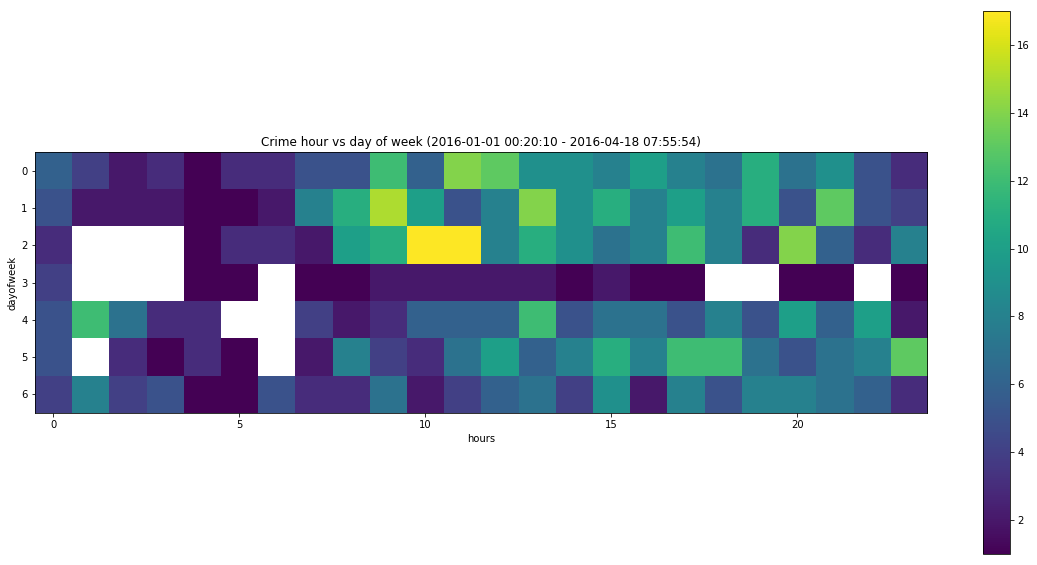

In [12]:
# for description in data['description'].unique()
fig, ax = plt.subplots(figsize=(20, 10))
plt.imshow(data['case'].groupby([data.index.dayofweek,data.index.hour]).agg('count').unstack(-1))
plt.colorbar()
plt.ylabel('dayofweek')
plt.xlabel('hours')
plt.title('Crime hour vs day of week ({0} - {1})'.format(data.index.min(), data.index.max()))

/home/gfurlich/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 49.99999999999995, 'dayofweek')

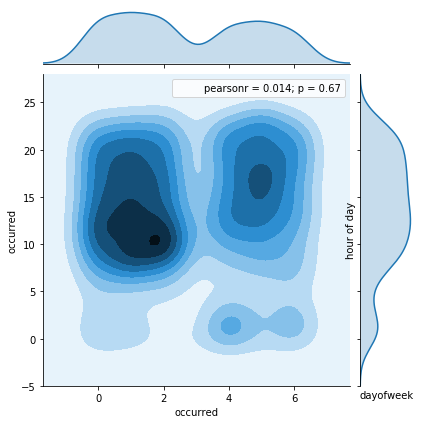

In [52]:
import seaborn as sns
sns.jointplot(x=data.index.dayofweek,y=data.index.hour, kind="kde")
plt.ylabel('hour of day')
plt.xlabel('dayofweek')

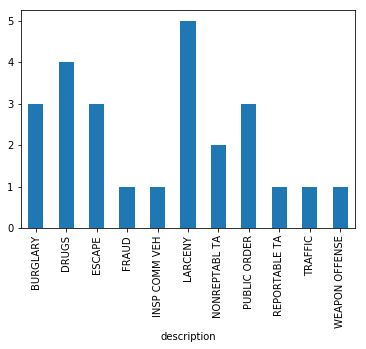

In [54]:
t = data[ (data.index.dayofweek == 2) & (data.index.hour > 10) & (data.index.hour < 13)]
t.groupby('description').case.agg('count').plot(kind='bar')

/home/gfurlich/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


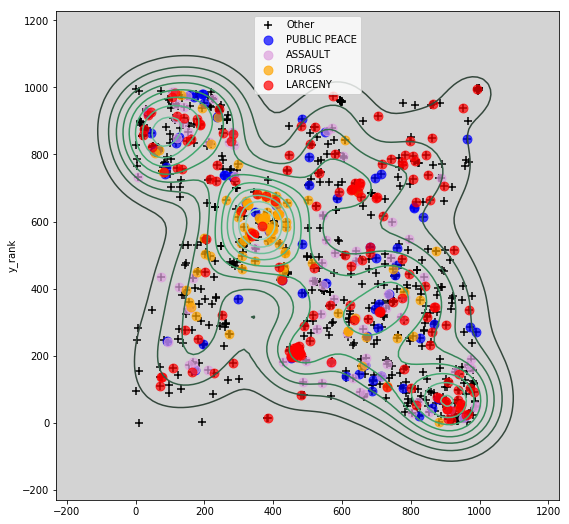

In [70]:
data["x"] = data["x_coordinate"]
data["y"] = data["y_coordiante"]
data["x_rank"] = np.argsort(data.x.values).argsort()
data["y_rank"] = np.argsort(data.y.values).argsort()

fig, ax = plt.subplots(figsize=(9, 9))
description_to_color = {
    "PUBLIC PEACE":"blue",
    #"ESCAPE":"",
    "ASSAULT":"plum",
    "DRUGS":"orange",
    #"PUBLIC ORDER":"",
    "LARCENY":"red",
}

ax.scatter(data["x_rank"].values, data["y_rank"].values, marker="+", c="k", s=75, label="Other")
sns.kdeplot(data["x_rank"].values, data["y_rank"])

for category in description_to_color:
    ax.patch.set_facecolor("lightgray")
    mask = data["description"] == category
    nmask = np.logical_not(mask)
    plt.scatter(
        data.x_rank[mask],
        data.y_rank[mask],
        c=description_to_color[category],
        alpha=0.7,
        s=80,
        label=category
    )
#     sns.kdeplot(data.x_rank[mask],
#         data.y_rank[mask],
# #         c=description_to_color[category]
#                )
plt.legend();